In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Alura Curso/flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [ ]:
dados.shape

(71175, 11)

In [ ]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [ ]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


# VISUALIZAÇÕES GRÁFICAS DE DADOS

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


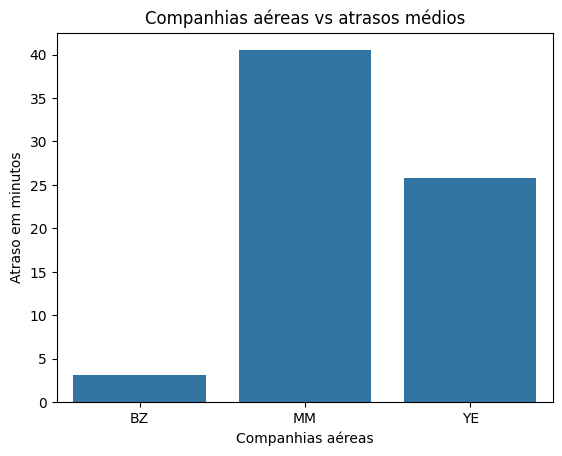

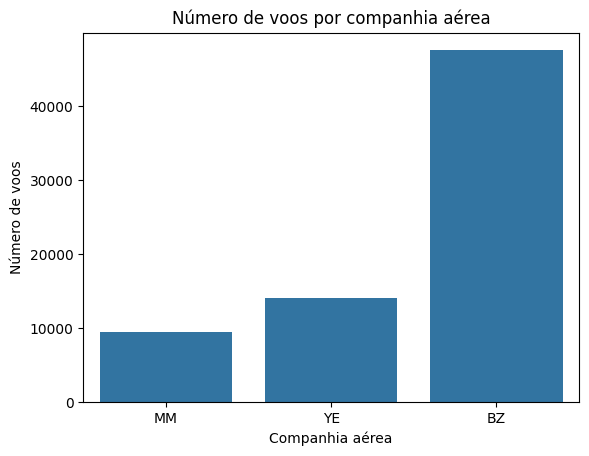

In [ ]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

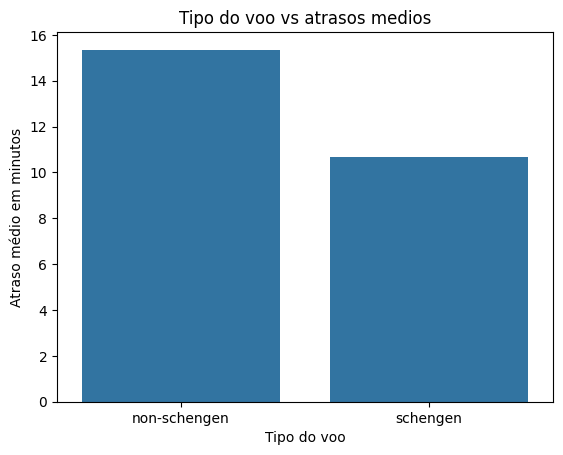

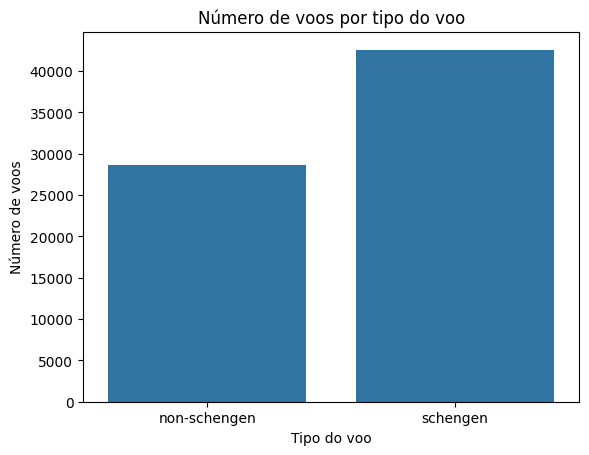

In [ ]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos medios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

<ipython-input-13-4a426aa43893>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_holiday', y='delay', data=average_delay, palette='YlOrRd')


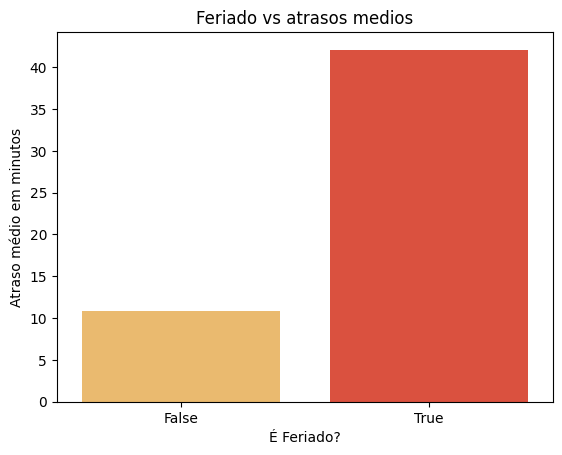

In [ ]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay, palette='YlOrRd')
plt.title('Feriado vs atrasos medios')
plt.xlabel('É Feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

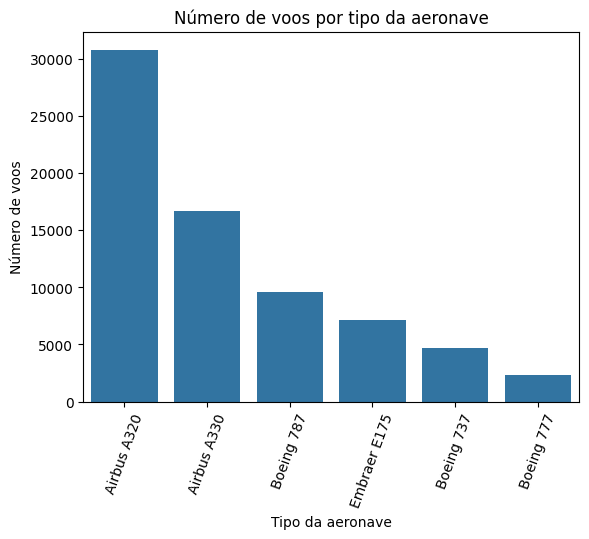

In [ ]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

# Analisando a distribuição de dados

In [5]:
import numpy as np

def calcular_largura_bin(df,coluna):
  Q75, Q25 = np.percentile(df[coluna],[75,25])
  IQR = Q75-Q25
  largura_bin= 2 * IQR *np.power(len(df[coluna]), -1/3)
  return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

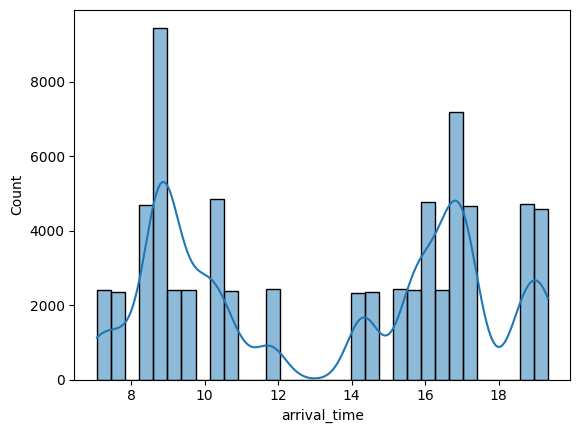

In [ ]:
largura_bin_at = calcular_largura_bin(dados,'arrival_time')

sns.histplot(data=dados,x='arrival_time', kde=True, bins=10, binwidth=largura_bin_at)

In [ ]:
largura_bin_at

0.3846176245547029

<Axes: xlabel='departure_time', ylabel='Count'>

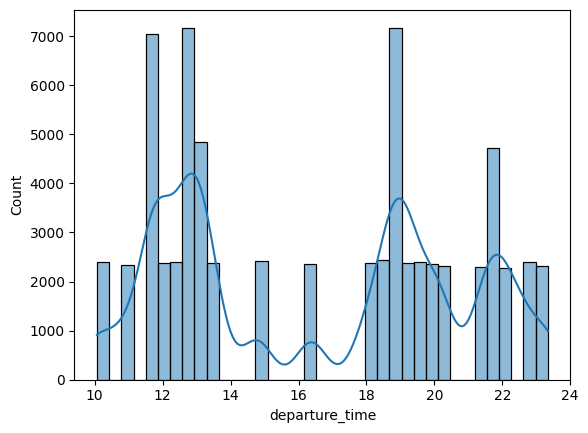

In [ ]:
 largura_bin_dt = calcular_largura_bin(dados,'departure_time')

sns.histplot(data=dados,x='departure_time', kde=True, bins=10, binwidth=largura_bin_dt)

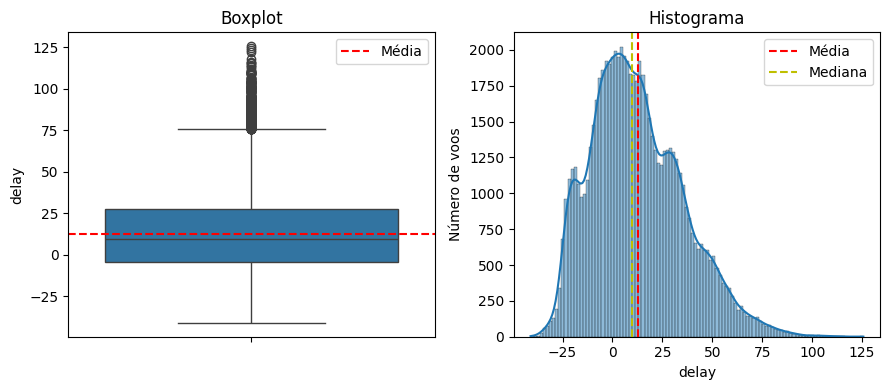

In [ ]:
mean_delay = dados ['delay'].mean()
median_delay = dados ['delay'].median()

fig, axes = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay,color='r', linestyle='--', label ='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados,'delay')

sns.histplot(data=dados,x='delay',ax=axes[1],kde=True,binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r',linestyle='--',label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--',label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# Feature engineering
  

In [ ]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [6]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day']+1).astype(str), format ='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [7]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [8]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


# Feature encoding

In [ ]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [ ]:
dados['is_weekend'] .unique()


array([False,  True])

In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen':0, 'schengen':1})
dados['is_holiday'] = dados['is_holiday'].replace({False:0, True:1})
dados['is_weekend'] = dados['is_weekend'].replace({False:0, True:1})
dados.head()

<ipython-input-22-1d04cb1a4891>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen':0, 'schengen':1})
<ipython-input-22-1d04cb1a4891>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False:0, True:1})
<ipython-input-22-1d04cb1a4891>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [9]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [10]:
df_encoded = pd.get_dummies(data=dados, columns= variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,non-schengen,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,...,1,0,0,1,0,0,0,0,0,0
1,10,non-schengen,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,...,1,0,0,1,0,0,0,0,0,0
2,3,schengen,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,...,0,1,0,1,0,0,0,0,0,0
3,28,non-schengen,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,...,0,0,0,1,0,0,0,0,0,0
4,15,non-schengen,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [11]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year','date'], axis = 1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,non-schengen,8.885071,False,70.205981,False,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,non-schengen,8.939996,False,38.484609,False,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,schengen,18.635384,False,2.388305,False,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,non-schengen,15.967963,False,19.138491,False,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,non-schengen,16.571894,False,15.016271,False,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['flight_id', 'departure_time', 'day', 'year','date']

one_hot_enc= make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown= 'ignore'),
     colunas_categoricas),
    remainder='passthrough'
)

dados_encoded = one_hot_enc.fit_transform(dados)

dados_encoded = pd.DataFrame(dados_encoded, columns= one_hot_enc.get_feature_names_out())
dados_encoded

# Seleção e validação do modelo

# Treinamento do DummyRegressor

In [12]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [15]:
y_pred_dummy = model_dummy.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas = {
      'Raiz do Erro Quadrático Médio': round(rmse, 4),
      'Erro Absoluto Médio': round(mae, 4),
      'R2 Score': round(r2,4)
  }

  return metricas

In [26]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 539.3584,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

In [27]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estratégia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estratégia: mean
Raiz do Erro Quadrático Médio: 539.3584
Erro Absoluto Médio: 18.6127
R2 Score: -0.0


Estratégia: median
Raiz do Erro Quadrático Médio: 547.7357
Erro Absoluto Médio: 18.4891
R2 Score: -0.0155


Estratégia: quantile
Raiz do Erro Quadrático Médio: 829.114
Erro Absoluto Médio: 22.0382
R2 Score: -0.5372


Estratégia: constant
Raiz do Erro Quadrático Médio: 546.1527
Erro Absoluto Médio: 18.4893
R2 Score: -0.0126


